In [3]:
import logging
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus, textcorpus
import numpy as np
from gensim.matutils import hellinger
import time
import pickle
import pyLDAvis
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler # for simple pca
from sklearn.decomposition import PCA

# load data
doc_year = [167,196,156,207,249,404,378,
271,
201,
768,
673,
823,
431,
681,
498,
597,
464,
657]

doc_ids =[0]+list(np.cumsum(doc_year))


alldata_new = pickle.load(open('output/dtm_processed_output.p', 'rb'))
term_topic = alldata_new['term_topic']# term_topic is n_years*n_topics*n_terms
term_frequency = alldata_new['term_frequency']#term_frequency is n_years*n_terms
terms = alldata_new['terms']#terms is n_terms

doc_topic = []
doc_length=[]
for year in range(len(term_topic)):    
    doc_topic.append(alldata_new['doc_topic'][doc_ids[year]:doc_ids[year+1]])# doc_topic is nyear*n_docs given year*n_topics
    doc_length.append(alldata_new['doc_length'][doc_ids[year]:doc_ids[year+1]]) #doc_length is nyear*n_docs given year

Topic Number: 0


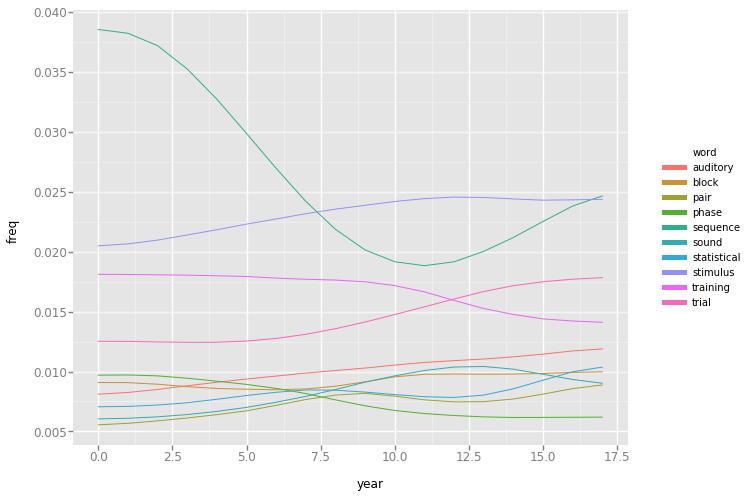

<ggplot: (-9223372036562397906)>
Topic Number: 1


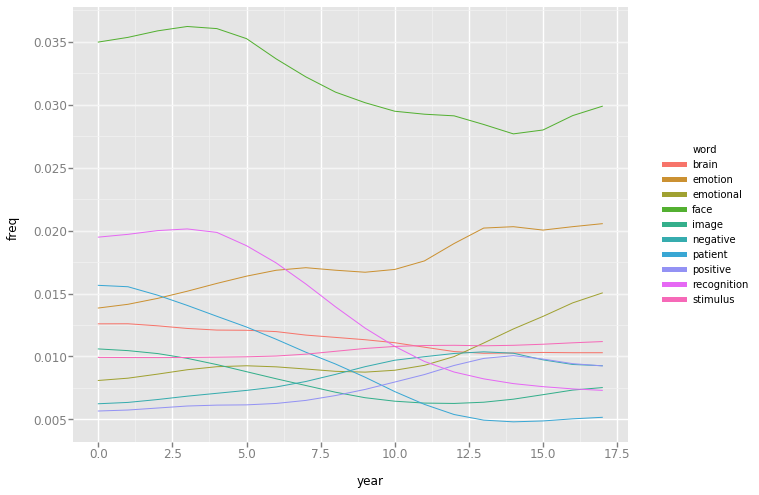

<ggplot: (-9223372036562397857)>
Topic Number: 2


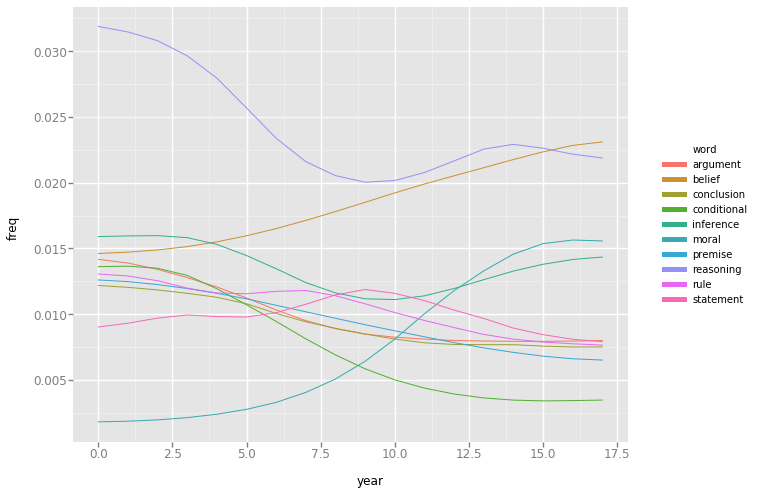

<ggplot: (-9223372036562397794)>
Topic Number: 3


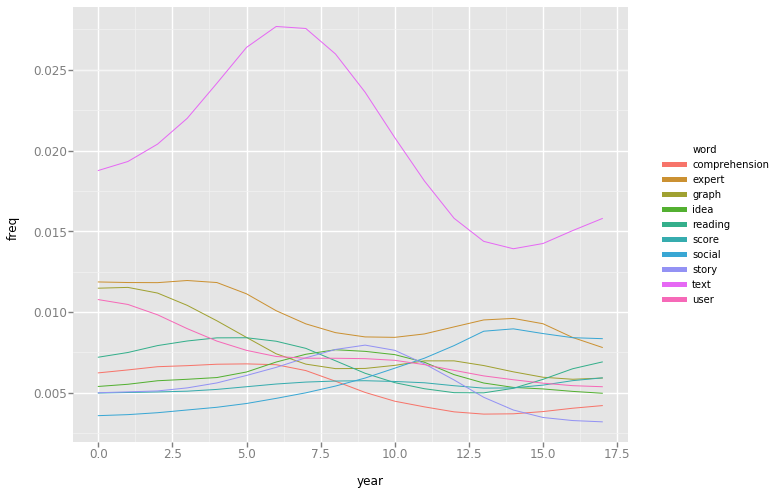

<ggplot: (292378074)>
Topic Number: 4


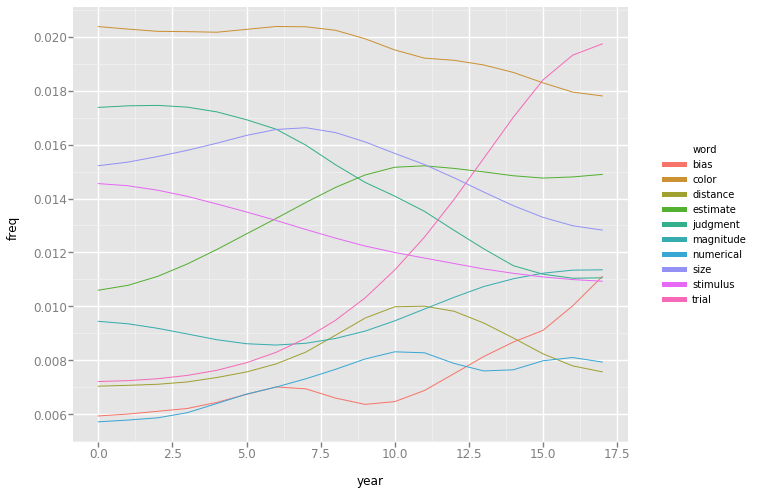

<ggplot: (292381739)>
Topic Number: 5


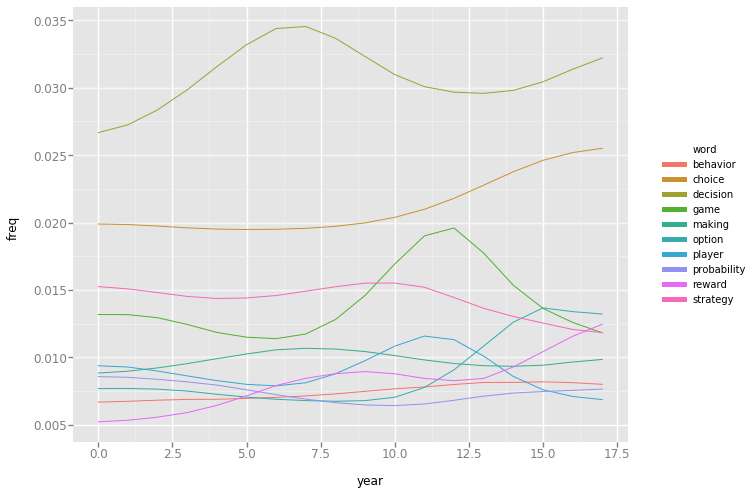

<ggplot: (-9223372036562394010)>
Topic Number: 6


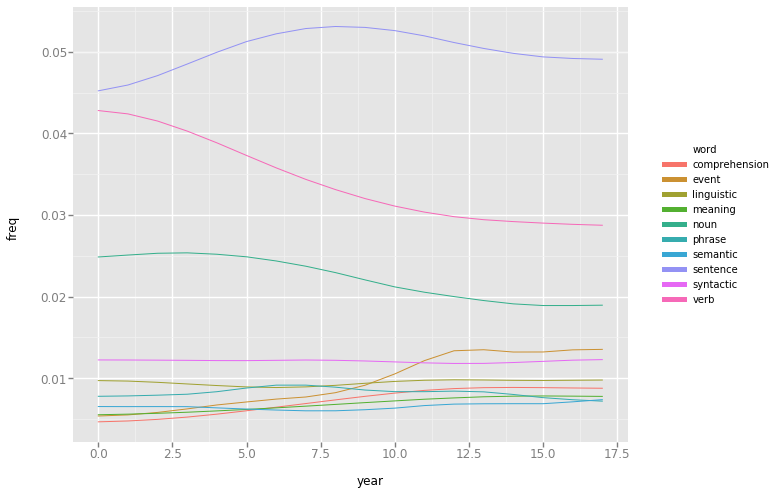

<ggplot: (-9223372036562397878)>
Topic Number: 7


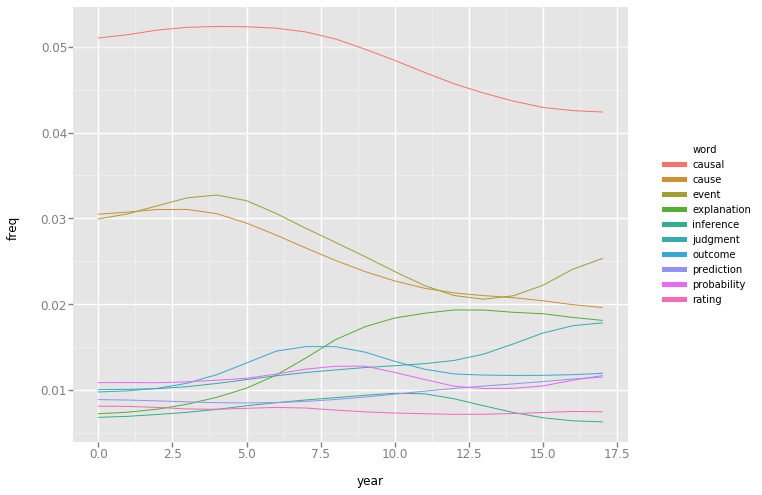

<ggplot: (-9223372036562393961)>
Topic Number: 8


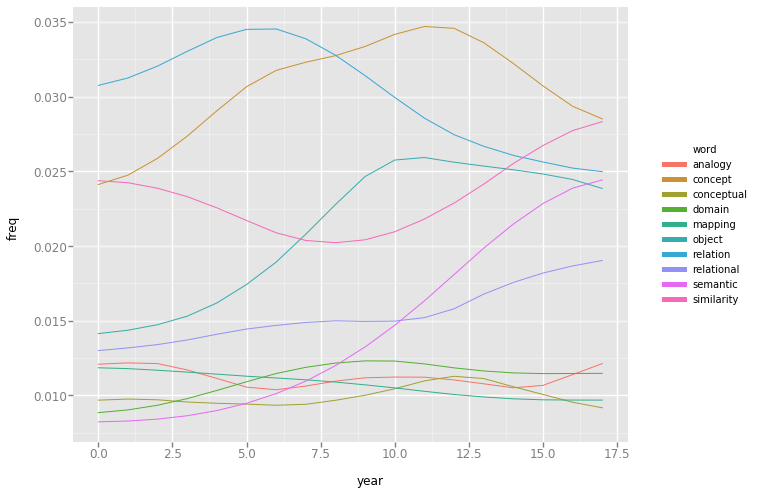

<ggplot: (-9223372036562393884)>
Topic Number: 9


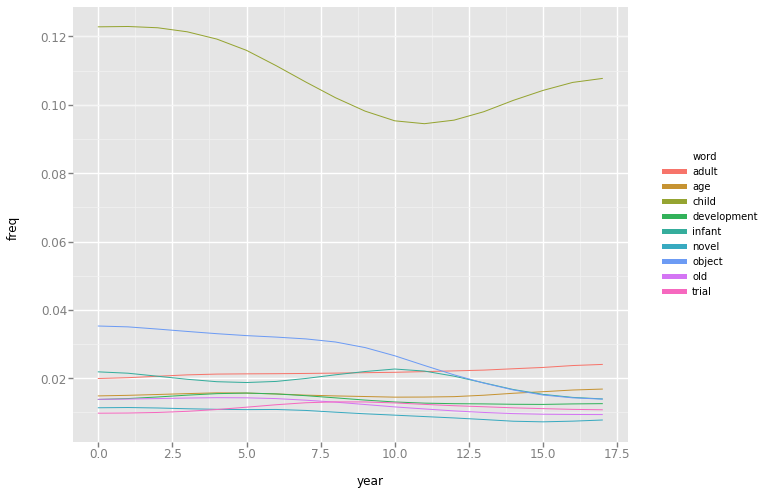

<ggplot: (292383752)>
Topic Number: 10


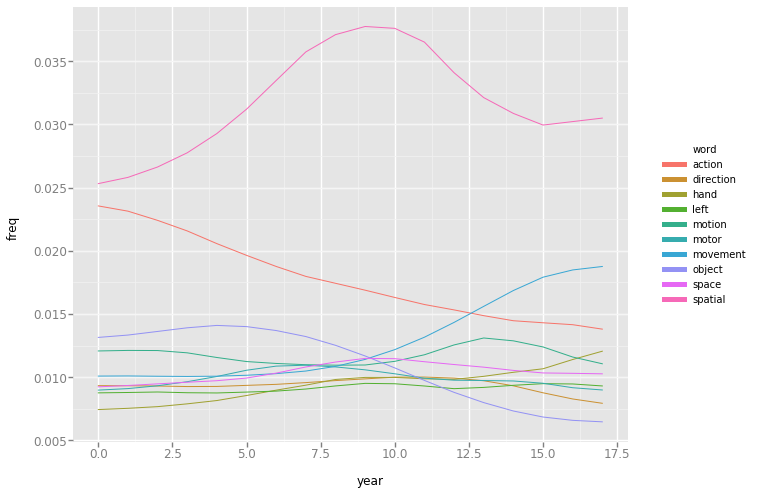

<ggplot: (-9223372036562391948)>
Topic Number: 11


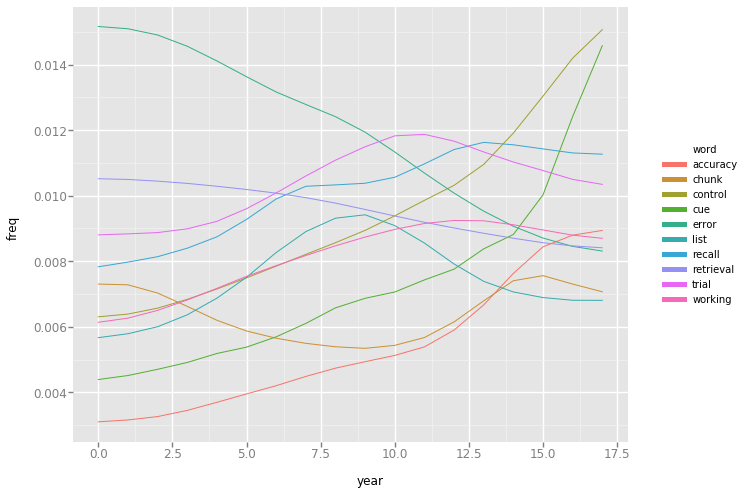

<ggplot: (292383934)>
Topic Number: 12


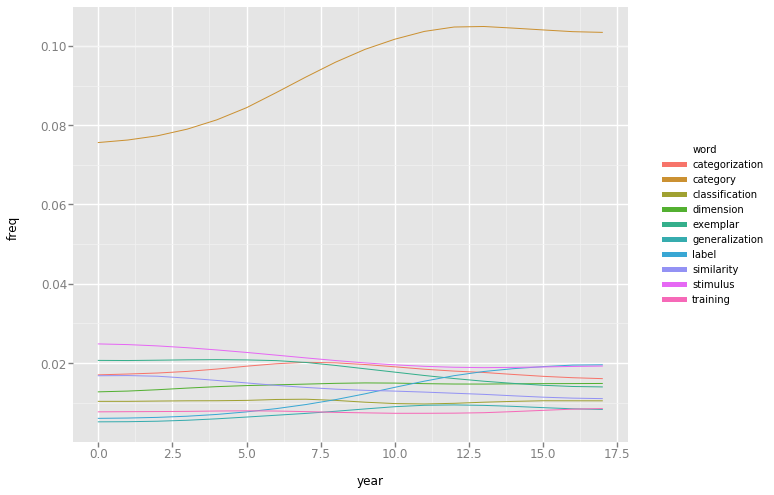

<ggplot: (292384776)>
Topic Number: 13


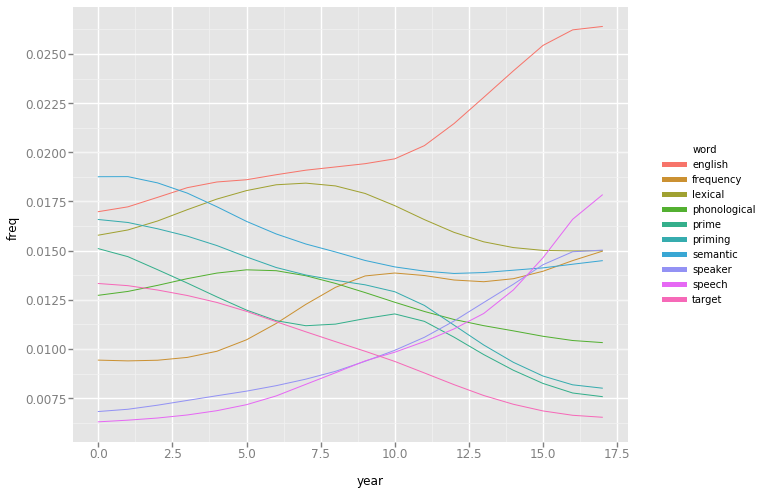

<ggplot: (-9223372036562390980)>
Topic Number: 14


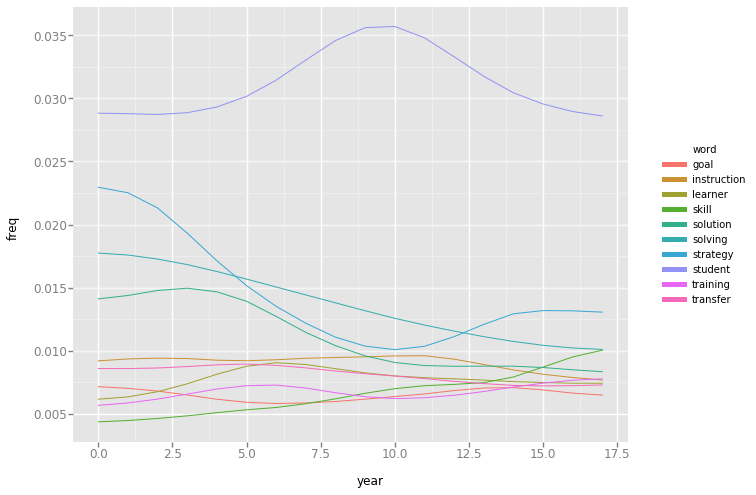

<ggplot: (-9223372036562390910)>
Topic Number: 15


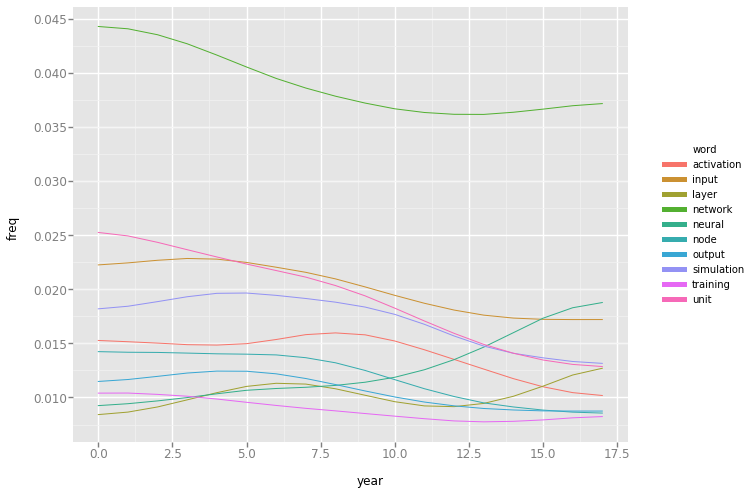

<ggplot: (-9223372036562390847)>
Topic Number: 16


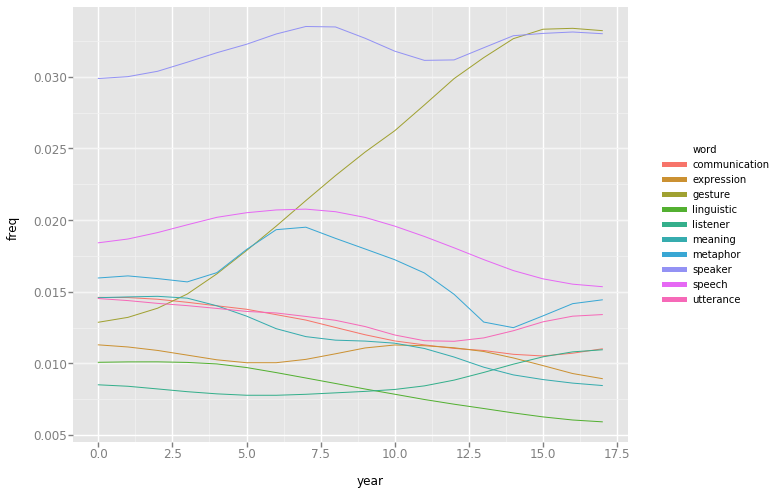

<ggplot: (292386824)>
Topic Number: 17


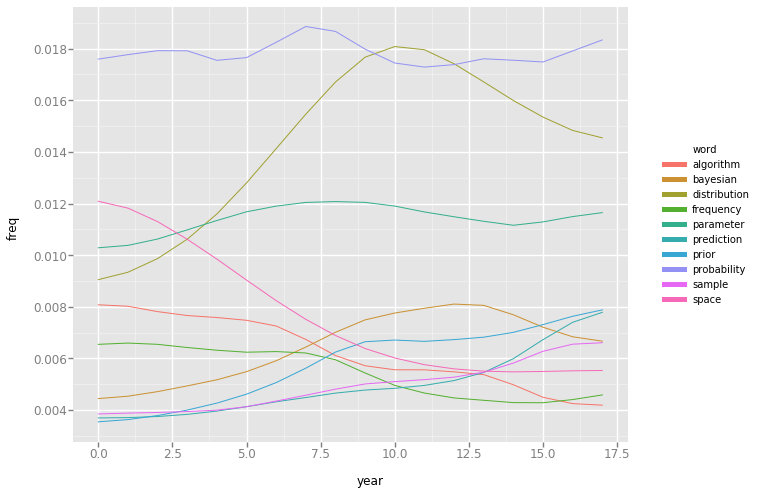

<ggplot: (292384860)>
Topic Number: 18


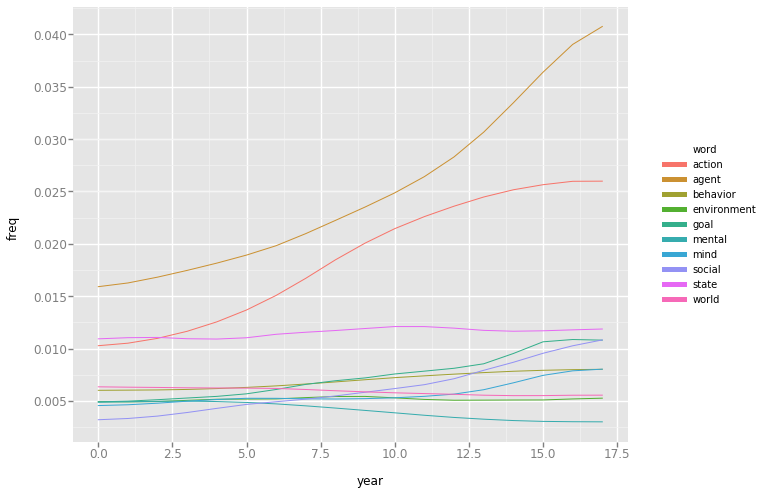

<ggplot: (292384923)>
Topic Number: 19


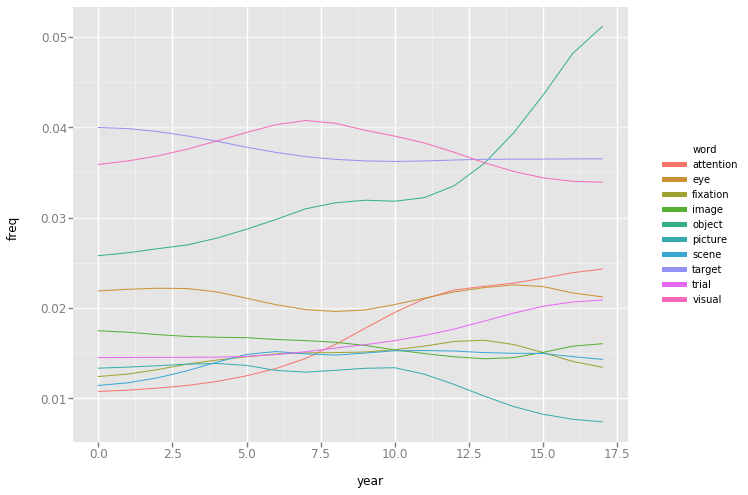

<ggplot: (292386873)>


In [4]:
from ggplot import *
graphs = []
for topic_num in range(20):
    topic_np = term_topic[:,topic_num,:]
    topidx = np.argsort(-topic_np.sum(0))[:10]
    topic_np = topic_np[:,topidx]
    df = pd.DataFrame(topic_np, columns=np.array(terms)[topidx])
    df['year'] = range(18)
    df = df.melt(id_vars=['year'], var_name='word', value_name='freq')
    graphs.append(ggplot(aes(x='year', y='freq', color='word'), data=df) + geom_line())
    
for i, g in enumerate(graphs):
    print('Topic Number:', i)
    print(g)